# Using Machine Learning Tools 2023, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#step 1,read ,descirbe and pre-process the data from the file
#import and visualize the data
trdata=pd.read_csv("sign_mnist_train.csv")
trdata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
trdata.info()
trdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.325369,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.374907,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,200.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [4]:
#check if there are any non-numeric data
print("Total remaining NaNs:", trdata.isna().sum().sum())
unique_labels = trdata.label.unique()
sorted_labels = np.sort(unique_labels)
print(f'Sorted label names are: {sorted_labels}')
print(f'Sorted label numbers are: {len(sorted_labels)}')

Total remaining NaNs: 0
Sorted label names are: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24 200]
Sorted label numbers are: 25


In [5]:
#200 is an unusual label, we should count the label with 200 to have a brief description about this data
count_label_200 = (trdata["label"] == 200).sum()
print(count_label_200)

1


In [6]:
#delete the abnormal data 200 and recheck 
trdata = trdata[trdata["label"] != 200]
unique_labels = trdata.label.unique()
sorted_labels = np.sort(unique_labels)
print(f'Sorted label names are: {sorted_labels}')
print(f'Sorted label numbers are: {len(sorted_labels)}')
#from the number of labels we can see we don't have every letters in training data, which cannot be solved by pre-processing because this
#is a problem of lacking data ,so we can only classify 24 outputs in the following models.

Sorted label names are: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Sorted label numbers are: 24


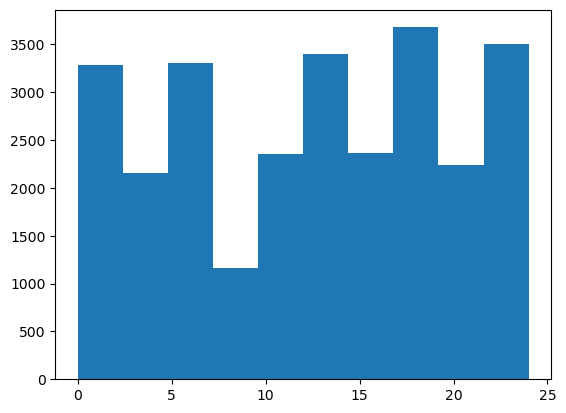

In [7]:
#take a look of our trainset labels to see if we have a relatively balanced dataset
labels=trdata["label"]
plt.hist(labels)
plt.show()

In [8]:
#The same thing goes to testset.
tedata=pd.read_csv("sign_mnist_test.csv")
tedata.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


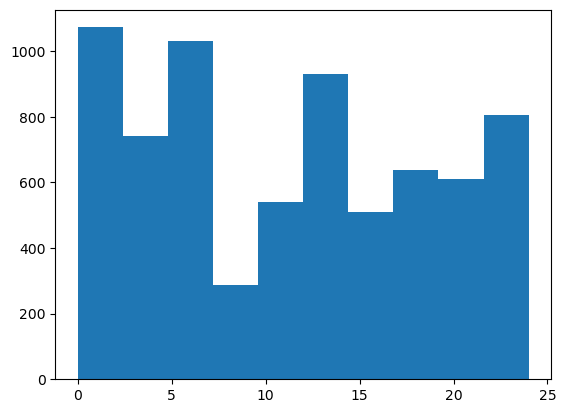

In [9]:
labels1=tedata["label"]
plt.hist(labels1)
plt.show()

In [10]:
tedata.info()
tedata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [11]:
print("Total remaining NaNs:", tedata.isna().sum().sum())
unique_labels = tedata.label.unique()
sorted_labels = np.sort(unique_labels)
print(f'Sorted label names are: {sorted_labels}')
#The data is ok,we can proceed the process.

Total remaining NaNs: 0
Sorted label names are: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [12]:
#split the train set, since train data isn't totally independent, we creat the validation data from the testset.
from sklearn.model_selection import train_test_split
test_set, val_set = train_test_split(tedata, test_size=0.25, random_state=20)
train_set=trdata
X_train = train_set.iloc[:, 1:]
y_train = train_set.iloc[:, 0]
X_test = test_set.iloc[:, 1:]
y_test = test_set.iloc[:, 0]
X_val = val_set.iloc[:, 1:]
y_val = val_set.iloc[:, 0]
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(27454, 784), (27454,), (5379, 784), (5379,), (1793, 784), (1793,)]


In [13]:
#see the value of a sample
print(X_train)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         107     118     127     134     139     143     146     150     153   
1         155     157     156     156     156     157     156     158     158   
2         187     188     188     187     187     186     187     188     187   
3         211     211     212     212     211     210     211     210     210   
4         164     167     170     172     176     179     180     184     185   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     189     189     190     190     192     193     193     193     193   
27451     151     154     157     158     160     161     163     164     166   
27452     174     174     174     174     174     175     175     174     173   
27453     177     181     184     185     187     189     190     191     191   
27454     179     180     180     180     182     181     182     183     182   

       pixel10  ...  pixel7

In [14]:
#we need to resize the data of every row so that plt can read it and scale the pixel value into 1
X_train_numpy = np.array(X_train) / 255
X_train_resized = np.array([np.resize(row, (28, 28)) for row in X_train_numpy])

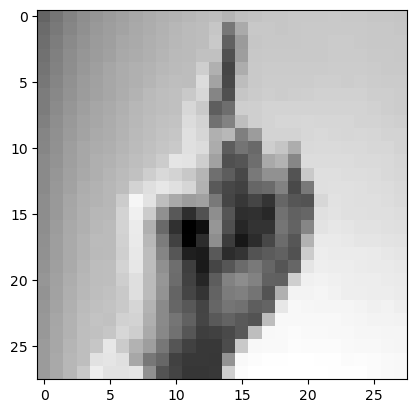

In [15]:
#check one of the pics to ensure we're doing right things
plt.imshow(X_train_resized[0], cmap='gray')
plt.grid(False)
plt.show()

In [16]:
#The same things go to other datasets
X_test_numpy = np.array(X_test) / 255
X_test_resized = np.array([np.resize(row, (28, 28)) for row in X_test_numpy])
X_val_numpy = np.array(X_val) / 255
X_val_resized = np.array([np.resize(row, (28, 28)) for row in X_val_numpy])

In [17]:
#import some module and give some default parameters
import tensorflow as tf
from tensorflow import keras
import sklearn
#sample numbers
n_train = 27454
n_valid = 1793
# the number and size of hidden layers
hiddensizes = [16, 32, 16]
# the activation function to be used by hidden layers
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01   
# size of batch and number of epochs
batch_size = 32
n_epochs = 20

# test different models

In [75]:
# Build a CNN and use default paras as baseline model
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))   
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn)) 
        model.add(keras.layers.MaxPooling2D(pool_size=2))         
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                         
    model.add(keras.layers.Dense(25, activation = "softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [76]:
#set early stop as a way to stop training while our prformance doesn't increase
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

In [77]:
#combine the operation
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [78]:
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 11s 12ms/step - loss: 2.9640 - accuracy: 0.1405 - val_loss: 2.1979 - val_accuracy: 0.3664
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: 1.4281 - accuracy: 0.5597 - val_loss: 1.1808 - val_accuracy: 0.6174
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 0.6508 - accuracy: 0.8031 - val_loss: 0.8580 - val_accuracy: 0.7122
Epoch 4/20
858/858 [==============================] - 12s 14ms/step - loss: 0.3066 - accuracy: 0.9080 - val_loss: 0.6008 - val_accuracy: 0.7909
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1467 - accuracy: 0.9624 - val_loss: 0.5548 - val_accuracy: 0.8282
Epoch 6/20
858/858 [==============================] - 10s 12ms/step - loss: 0.0707 - accuracy: 0.9871 - val_loss: 0.4927 - val_accuracy: 0.8539
Epoch 7/20
858/858 [==============================] - 11s 12ms/step - loss: 0.0376 - accuracy: 0.9958 - val_loss: 0.4884 - val_accuracy:

In [18]:
# Plot the results
def plot_history(history):
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r') 
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

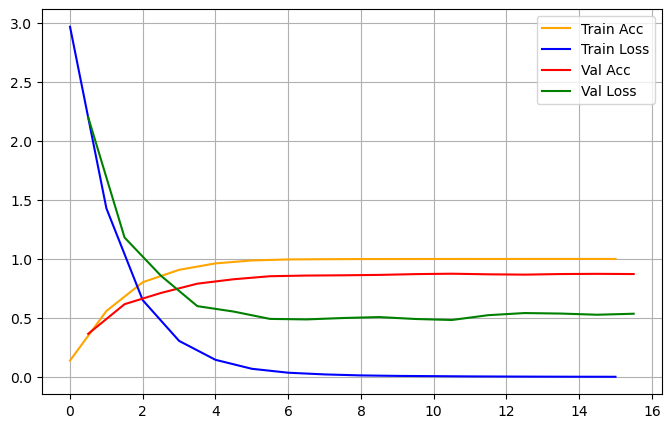

In [80]:
plot_history(history)

Epoch 1/20
858/858 [==============================] - 11s 13ms/step - loss: nan - accuracy: 0.0412 - val_loss: nan - val_accuracy: 0.0418
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0418
Epoch 3/20
858/858 [==============================] - 10s 11ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0418
Epoch 4/20
858/858 [==============================] - 10s 12ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0418
Epoch 5/20
858/858 [==============================] - 10s 11ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0418


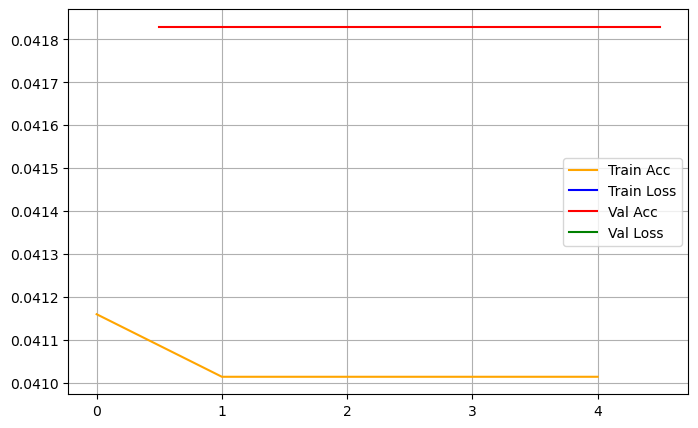

Epoch 1/20
858/858 [==============================] - 10s 12ms/step - loss: 0.7445 - accuracy: 0.7777 - val_loss: 0.3895 - val_accuracy: 0.8857
Epoch 2/20
858/858 [==============================] - 13s 15ms/step - loss: 0.0147 - accuracy: 0.9977 - val_loss: 0.3721 - val_accuracy: 0.9091
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4057 - val_accuracy: 0.9057
Epoch 4/20
858/858 [==============================] - 10s 12ms/step - loss: 9.9831e-04 - accuracy: 1.0000 - val_loss: 0.4185 - val_accuracy: 0.9108
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 6.4966e-04 - accuracy: 1.0000 - val_loss: 0.4311 - val_accuracy: 0.9119
Epoch 6/20
858/858 [==============================] - 10s 11ms/step - loss: 4.8404e-04 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 0.9113
Epoch 7/20
858/858 [==============================] - 10s 12ms/step - loss: 3.8131e-04 - accuracy: 1.0000 - val_loss: 0.4539

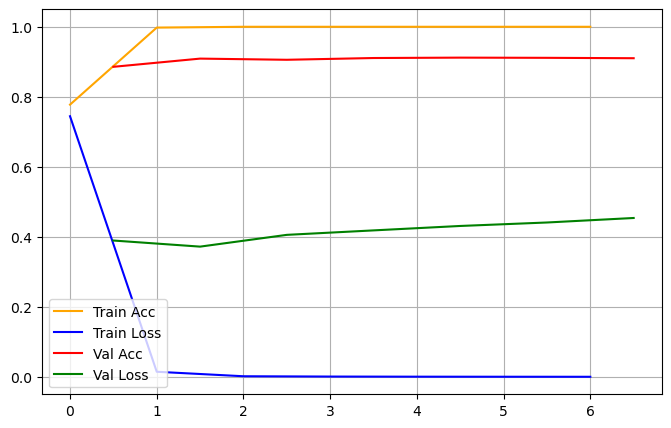

Epoch 1/20
858/858 [==============================] - 11s 13ms/step - loss: 2.9633 - accuracy: 0.1453 - val_loss: 2.2112 - val_accuracy: 0.3519
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 1.2912 - accuracy: 0.6149 - val_loss: 0.9990 - val_accuracy: 0.6888
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 0.5284 - accuracy: 0.8365 - val_loss: 0.7177 - val_accuracy: 0.7680
Epoch 4/20
858/858 [==============================] - 10s 12ms/step - loss: 0.2496 - accuracy: 0.9262 - val_loss: 0.6153 - val_accuracy: 0.8098
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1202 - accuracy: 0.9706 - val_loss: 0.5077 - val_accuracy: 0.8500
Epoch 6/20
858/858 [==============================] - 12s 14ms/step - loss: 0.0577 - accuracy: 0.9909 - val_loss: 0.4741 - val_accuracy: 0.8723
Epoch 7/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0308 - accuracy: 0.9972 - val_loss: 0.5301 - val_accuracy:

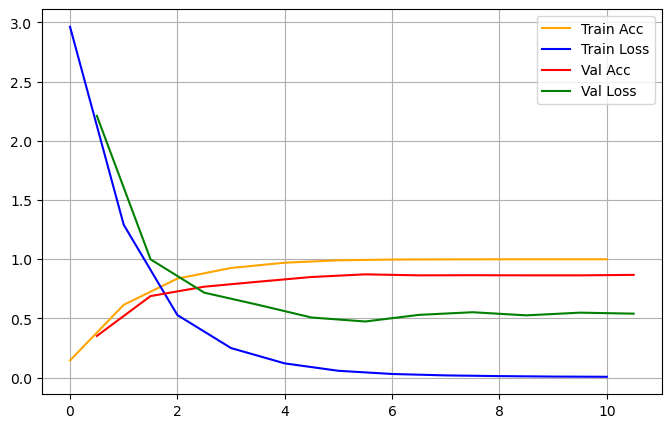

Epoch 1/20
858/858 [==============================] - 13s 14ms/step - loss: 3.2162 - accuracy: 0.0542 - val_loss: 3.2009 - val_accuracy: 0.0502
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: 3.1765 - accuracy: 0.0620 - val_loss: 3.1744 - val_accuracy: 0.0407
Epoch 3/20
858/858 [==============================] - 9s 11ms/step - loss: 3.1428 - accuracy: 0.0820 - val_loss: 3.1394 - val_accuracy: 0.0747
Epoch 4/20
858/858 [==============================] - 9s 11ms/step - loss: 3.0969 - accuracy: 0.1413 - val_loss: 3.0833 - val_accuracy: 0.1350
Epoch 5/20
858/858 [==============================] - 9s 11ms/step - loss: 3.0213 - accuracy: 0.1995 - val_loss: 2.9775 - val_accuracy: 0.1907
Epoch 6/20
858/858 [==============================] - 9s 11ms/step - loss: 2.8728 - accuracy: 0.2379 - val_loss: 2.7686 - val_accuracy: 0.2421
Epoch 7/20
858/858 [==============================] - 9s 11ms/step - loss: 2.6146 - accuracy: 0.2870 - val_loss: 2.4597 - val_accuracy: 0.31

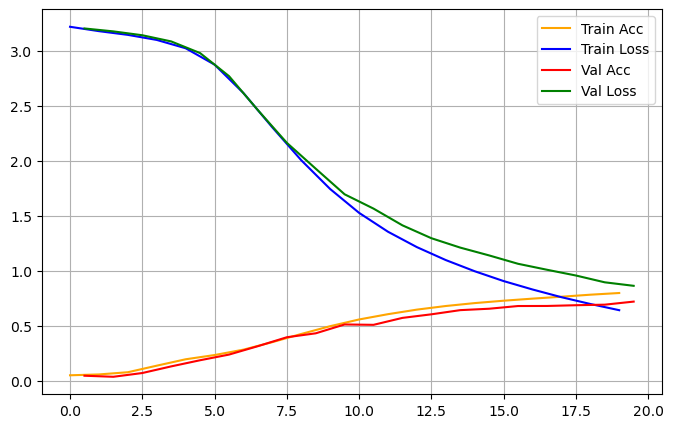

Epoch 1/20
858/858 [==============================] - 12s 13ms/step - loss: 3.2254 - accuracy: 0.0442 - val_loss: 3.2046 - val_accuracy: 0.0904
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 3.2181 - accuracy: 0.0446 - val_loss: 3.2044 - val_accuracy: 0.0837
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 3.2128 - accuracy: 0.0383 - val_loss: 3.2043 - val_accuracy: 0.0374
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 3.2085 - accuracy: 0.0383 - val_loss: 3.2042 - val_accuracy: 0.0301
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 3.2048 - accuracy: 0.0456 - val_loss: 3.2040 - val_accuracy: 0.0374
Epoch 6/20
858/858 [==============================] - 11s 13ms/step - loss: 3.2016 - accuracy: 0.0546 - val_loss: 3.2036 - val_accuracy: 0.0418
Epoch 7/20
858/858 [==============================] - 11s 13ms/step - loss: 3.1986 - accuracy: 0.0590 - val_loss: 3.2030 - val_accuracy:

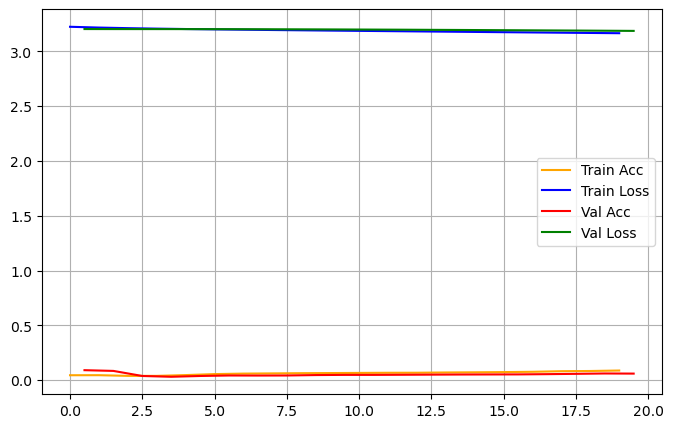

[[0.01, 0.04182933643460274], [0.001, 0.9118795394897461], [0.0001, 0.8722810745239258], [1e-05, 0.7228109240531921], [1.0000000000000002e-06, 0.09035136550664902]]


In [81]:
#change lr to test the different performance
res=[]
for lr in [1,0.1, 0.01,0.001,0.0001]:
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr*learningrate,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

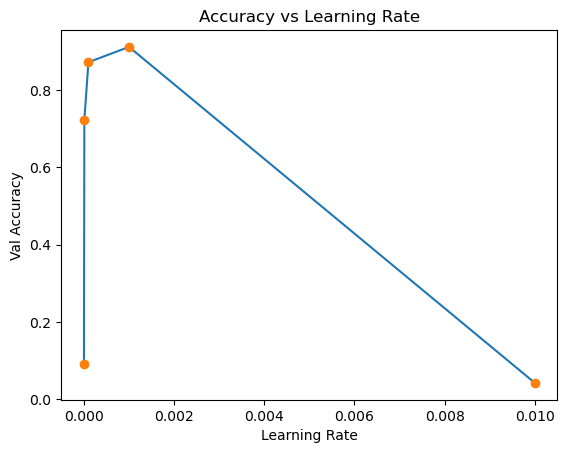

In [82]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

Epoch 1/20
858/858 [==============================] - 10s 11ms/step - loss: 2.3868 - accuracy: 0.3202 - val_loss: 1.4080 - val_accuracy: 0.5811
Epoch 2/20
858/858 [==============================] - 9s 10ms/step - loss: 0.8654 - accuracy: 0.7448 - val_loss: 0.9562 - val_accuracy: 0.7061
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 0.4945 - accuracy: 0.8551 - val_loss: 0.8204 - val_accuracy: 0.7295
Epoch 4/20
858/858 [==============================] - 8s 9ms/step - loss: 0.3011 - accuracy: 0.9144 - val_loss: 0.8603 - val_accuracy: 0.7423
Epoch 5/20
858/858 [==============================] - 8s 10ms/step - loss: 0.1841 - accuracy: 0.9520 - val_loss: 0.7183 - val_accuracy: 0.7948
Epoch 6/20
858/858 [==============================] - 8s 9ms/step - loss: 0.1118 - accuracy: 0.9772 - val_loss: 0.7351 - val_accuracy: 0.7920
Epoch 7/20
858/858 [==============================] - 8s 10ms/step - loss: 0.0706 - accuracy: 0.9896 - val_loss: 0.7642 - val_accuracy: 0.8065

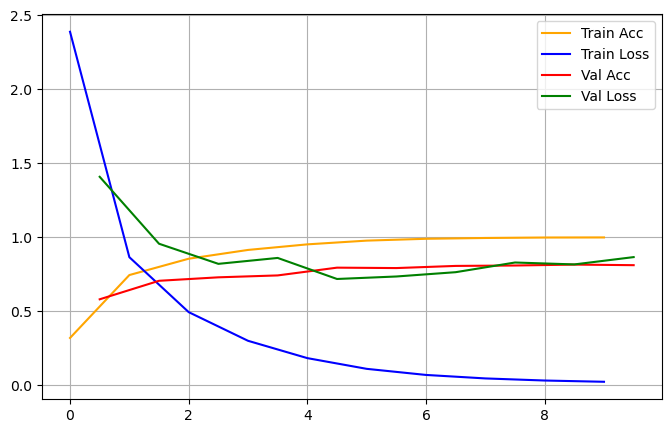

Epoch 1/20
858/858 [==============================] - 12s 14ms/step - loss: 2.7214 - accuracy: 0.2043 - val_loss: 1.7630 - val_accuracy: 0.4584
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: 1.1137 - accuracy: 0.6524 - val_loss: 1.0130 - val_accuracy: 0.6704
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.5389 - accuracy: 0.8323 - val_loss: 0.6686 - val_accuracy: 0.7786
Epoch 4/20
858/858 [==============================] - 13s 15ms/step - loss: 0.2736 - accuracy: 0.9162 - val_loss: 0.5689 - val_accuracy: 0.8293
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1398 - accuracy: 0.9626 - val_loss: 0.4849 - val_accuracy: 0.8466
Epoch 6/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0716 - accuracy: 0.9864 - val_loss: 0.4550 - val_accuracy: 0.8706
Epoch 7/20
858/858 [==============================] - 12s 14ms/step - loss: 0.0401 - accuracy: 0.9941 - val_loss: 0.4648 - val_accuracy:

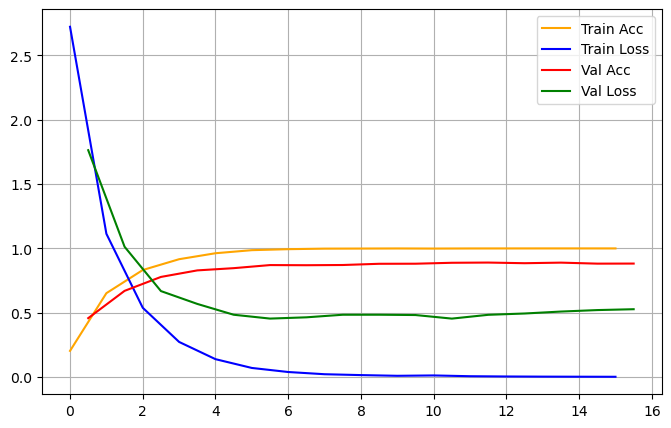

Epoch 1/20
858/858 [==============================] - 11s 12ms/step - loss: 2.9032 - accuracy: 0.1598 - val_loss: 2.1160 - val_accuracy: 0.3804
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 1.2586 - accuracy: 0.6152 - val_loss: 0.9784 - val_accuracy: 0.7016
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.5499 - accuracy: 0.8295 - val_loss: 0.7210 - val_accuracy: 0.7780
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 0.2676 - accuracy: 0.9194 - val_loss: 0.5817 - val_accuracy: 0.8087
Epoch 5/20
858/858 [==============================] - 11s 12ms/step - loss: 0.1316 - accuracy: 0.9673 - val_loss: 0.5918 - val_accuracy: 0.8059
Epoch 6/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0666 - accuracy: 0.9878 - val_loss: 0.4717 - val_accuracy: 0.8567
Epoch 7/20
858/858 [==============================] - 10s 12ms/step - loss: 0.0351 - accuracy: 0.9957 - val_loss: 0.4756 - val_accuracy:

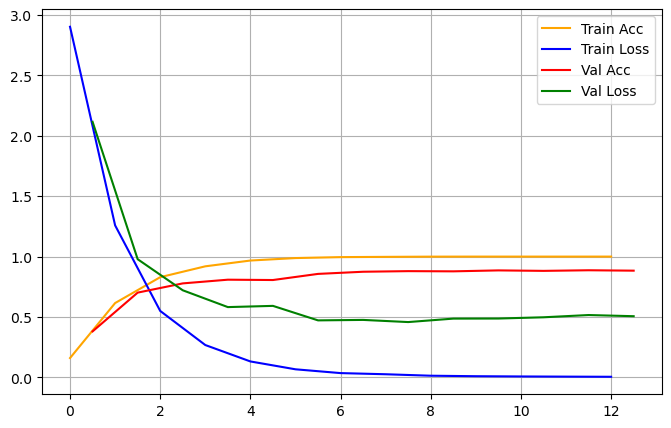

Epoch 1/20
858/858 [==============================] - 13s 15ms/step - loss: 2.7357 - accuracy: 0.2020 - val_loss: 1.8091 - val_accuracy: 0.4378
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 1.0685 - accuracy: 0.6778 - val_loss: 0.8919 - val_accuracy: 0.6983
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 0.4661 - accuracy: 0.8544 - val_loss: 0.5784 - val_accuracy: 0.8193
Epoch 4/20
858/858 [==============================] - 12s 13ms/step - loss: 0.2251 - accuracy: 0.9336 - val_loss: 0.5147 - val_accuracy: 0.8310
Epoch 5/20
858/858 [==============================] - 13s 15ms/step - loss: 0.1080 - accuracy: 0.9747 - val_loss: 0.5034 - val_accuracy: 0.8494
Epoch 6/20
858/858 [==============================] - 11s 12ms/step - loss: 0.0562 - accuracy: 0.9907 - val_loss: 0.4455 - val_accuracy: 0.8767
Epoch 7/20
858/858 [==============================] - 10s 11ms/step - loss: 0.0310 - accuracy: 0.9968 - val_loss: 0.4489 - val_accuracy:

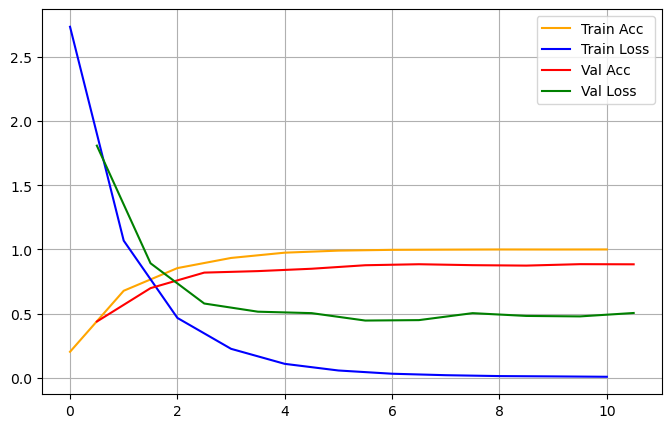

Epoch 1/20
858/858 [==============================] - 13s 14ms/step - loss: 2.7717 - accuracy: 0.2013 - val_loss: 1.9102 - val_accuracy: 0.4462
Epoch 2/20
858/858 [==============================] - 12s 14ms/step - loss: 1.0917 - accuracy: 0.6686 - val_loss: 0.9433 - val_accuracy: 0.7050
Epoch 3/20
858/858 [==============================] - 11s 12ms/step - loss: 0.4867 - accuracy: 0.8451 - val_loss: 0.7163 - val_accuracy: 0.7568
Epoch 4/20
858/858 [==============================] - 9s 11ms/step - loss: 0.2423 - accuracy: 0.9269 - val_loss: 0.5136 - val_accuracy: 0.8104
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 0.1202 - accuracy: 0.9693 - val_loss: 0.5188 - val_accuracy: 0.8371
Epoch 6/20
858/858 [==============================] - 13s 15ms/step - loss: 0.0637 - accuracy: 0.9874 - val_loss: 0.4687 - val_accuracy: 0.8489
Epoch 7/20
858/858 [==============================] - 13s 15ms/step - loss: 0.0352 - accuracy: 0.9954 - val_loss: 0.4061 - val_accuracy: 

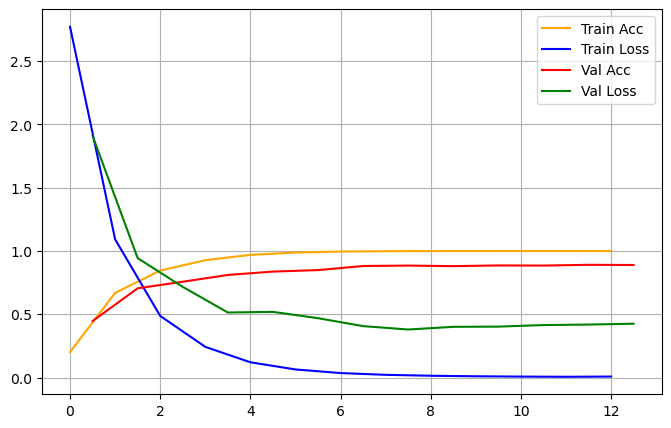

[[1, 0.8153932094573975], [3, 0.8901282548904419], [5, 0.8867819309234619], [7, 0.8851087689399719], [12, 0.8906859755516052]]


In [83]:
#change the number of hidden layers to test different performances 
res=[]
for n in [1, 3, 5, 7, 12]:
    valacc, history, discard = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

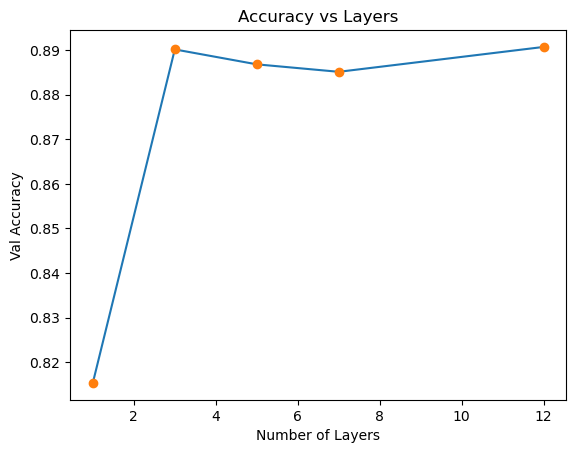

In [84]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')

Epoch 1/20
858/858 [==============================] - 11s 13ms/step - loss: 2.9519 - accuracy: 0.1586 - val_loss: 2.1944 - val_accuracy: 0.3536
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 1.2607 - accuracy: 0.6188 - val_loss: 1.0067 - val_accuracy: 0.6955
Epoch 3/20
858/858 [==============================] - 11s 12ms/step - loss: 0.5506 - accuracy: 0.8300 - val_loss: 0.6635 - val_accuracy: 0.7948
Epoch 4/20
858/858 [==============================] - 11s 12ms/step - loss: 0.2689 - accuracy: 0.9209 - val_loss: 0.5652 - val_accuracy: 0.8070
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 0.1349 - accuracy: 0.9657 - val_loss: 0.4393 - val_accuracy: 0.8533
Epoch 6/20
858/858 [==============================] - 11s 12ms/step - loss: 0.0709 - accuracy: 0.9871 - val_loss: 0.4217 - val_accuracy: 0.8667
Epoch 7/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0378 - accuracy: 0.9954 - val_loss: 0.3957 - val_accuracy:

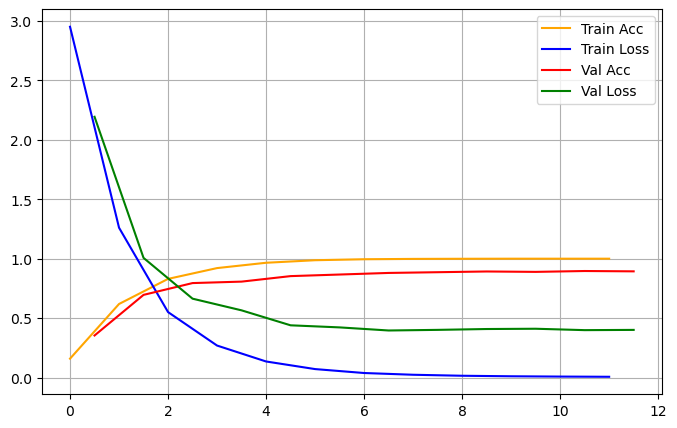

Epoch 1/20
858/858 [==============================] - 11s 11ms/step - loss: 0.6787 - accuracy: 0.8716 - val_loss: 3.7631 - val_accuracy: 0.8020
Epoch 2/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1401 - accuracy: 0.9863 - val_loss: 3.0452 - val_accuracy: 0.8968
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.5667 - accuracy: 0.9765 - val_loss: 5.6048 - val_accuracy: 0.9052
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 0.3618 - accuracy: 0.9894 - val_loss: 6.7341 - val_accuracy: 0.9225
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 0.4110 - accuracy: 0.9901 - val_loss: 24.6634 - val_accuracy: 0.8639
Epoch 6/20
858/858 [==============================] - 11s 13ms/step - loss: 0.5304 - accuracy: 0.9918 - val_loss: 17.9945 - val_accuracy: 0.9074
Epoch 7/20
858/858 [==============================] - 10s 12ms/step - loss: 0.6099 - accuracy: 0.9924 - val_loss: 28.0823 - val_accura

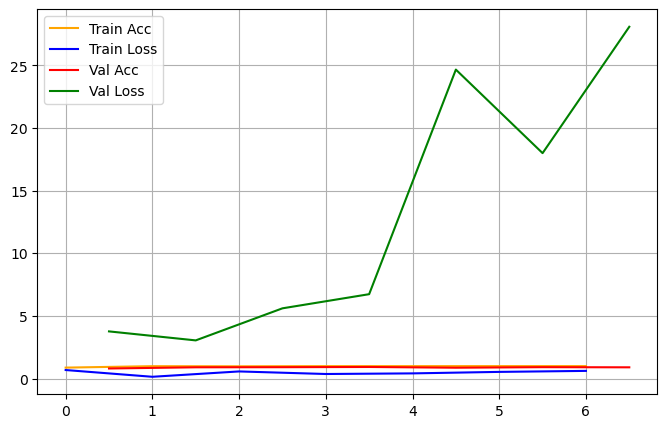

Epoch 1/20
858/858 [==============================] - 11s 12ms/step - loss: 0.8180 - accuracy: 0.8277 - val_loss: 1.0905 - val_accuracy: 0.8840
Epoch 2/20
858/858 [==============================] - 10s 11ms/step - loss: 0.1197 - accuracy: 0.9834 - val_loss: 2.8513 - val_accuracy: 0.8896
Epoch 3/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1171 - accuracy: 0.9898 - val_loss: 3.4189 - val_accuracy: 0.8924
Epoch 4/20
858/858 [==============================] - 11s 13ms/step - loss: 0.1164 - accuracy: 0.9930 - val_loss: 4.9909 - val_accuracy: 0.9035
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.0822 - accuracy: 0.9958 - val_loss: 6.5122 - val_accuracy: 0.9119
Epoch 6/20
858/858 [==============================] - 11s 12ms/step - loss: 0.1023 - accuracy: 0.9957 - val_loss: 9.2054 - val_accuracy: 0.8846


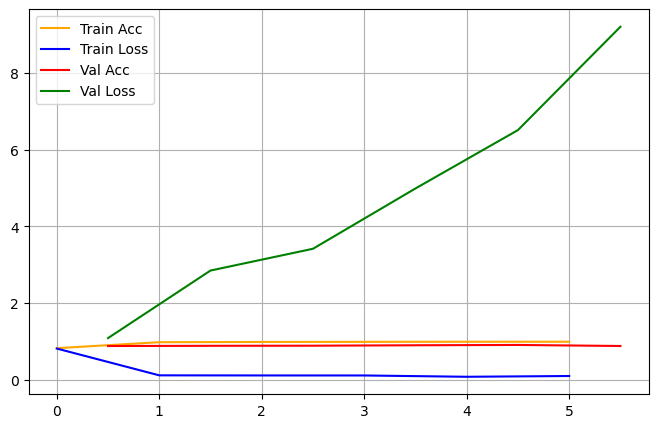

Epoch 1/20
858/858 [==============================] - 13s 13ms/step - loss: 0.5100 - accuracy: 0.8880 - val_loss: 2.1657 - val_accuracy: 0.8823
Epoch 2/20
858/858 [==============================] - 13s 15ms/step - loss: 0.1744 - accuracy: 0.9832 - val_loss: 4.1881 - val_accuracy: 0.8745
Epoch 3/20
858/858 [==============================] - 10s 12ms/step - loss: 0.4161 - accuracy: 0.9801 - val_loss: 5.0087 - val_accuracy: 0.9113
Epoch 4/20
858/858 [==============================] - 10s 12ms/step - loss: 0.4090 - accuracy: 0.9881 - val_loss: 10.5188 - val_accuracy: 0.8968
Epoch 5/20
858/858 [==============================] - 11s 13ms/step - loss: 0.3195 - accuracy: 0.9929 - val_loss: 16.4041 - val_accuracy: 0.9069
Epoch 6/20
858/858 [==============================] - 10s 12ms/step - loss: 0.6387 - accuracy: 0.9902 - val_loss: 29.7736 - val_accuracy: 0.8834


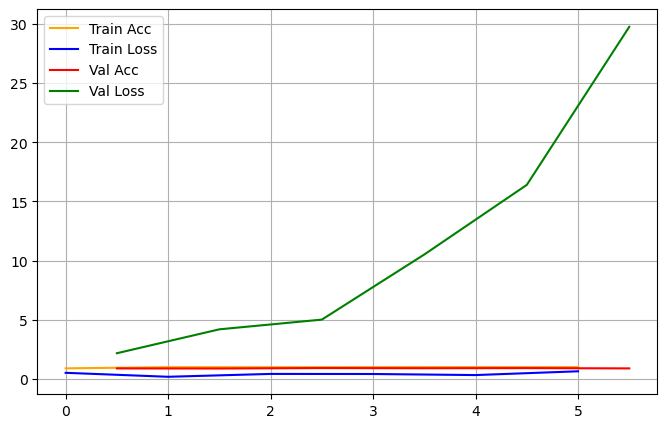

In [86]:
#change the optimizer to test different performances
res=[]
optimizer_setup = [[keras.optimizers.SGD,0.01], [keras.optimizers.Adam,0.01],[keras.optimizers.RMSprop, 0.01], [keras.optimizers.Nadam, 0.01]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

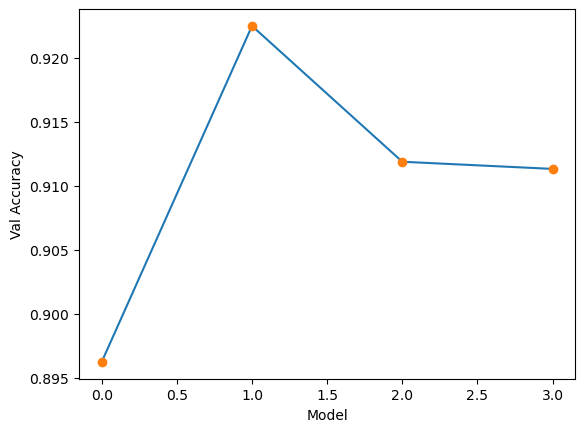

In [87]:
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

In [52]:
# Build a DNN model and use defalut paras as baseline
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(25, activation = "softmax"))   
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [54]:
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [55]:
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.9180 - accuracy: 0.1586 - val_loss: 2.6086 - val_accuracy: 0.2153
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.2154 - accuracy: 0.3135 - val_loss: 1.9564 - val_accuracy: 0.3737
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7722 - accuracy: 0.4205 - val_loss: 1.7220 - val_accuracy: 0.4557
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.5203 - accuracy: 0.5003 - val_loss: 1.5608 - val_accuracy: 0.4941
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.3168 - accuracy: 0.5683 - val_loss: 1.6877 - val_accuracy: 0.4456
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1572 - accuracy: 0.6243 - val_loss: 1.4376 - val_accuracy: 0.5683
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0298 - accuracy: 0.6638 - val_loss: 1.3686 - val_accuracy: 0.5683
Epoch 

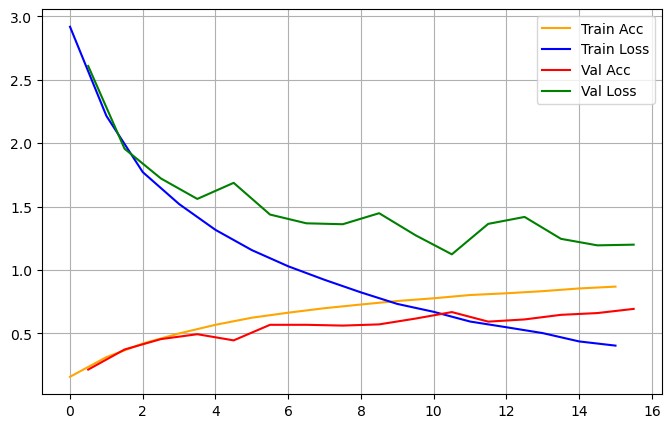

In [57]:
plot_history(history)

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 10486.1543 - accuracy: 0.0423 - val_loss: 3543.3875 - val_accuracy: 0.0323
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 694.6649 - accuracy: 0.0428 - val_loss: 67.4786 - val_accuracy: 0.0368
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 31.2947 - accuracy: 0.0405 - val_loss: 3.6756 - val_accuracy: 0.0301
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 3.4342 - accuracy: 0.0427 - val_loss: 3.7890 - val_accuracy: 0.0368
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 3.4231 - accuracy: 0.0421 - val_loss: 3.7670 - val_accuracy: 0.0201
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 3.4295 - accuracy: 0.0424 - val_loss: 3.2635 - val_accuracy: 0.0284
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 3.4387 - accuracy: 0.0419 - val_loss: 3.3393 - val_accuracy: 0.

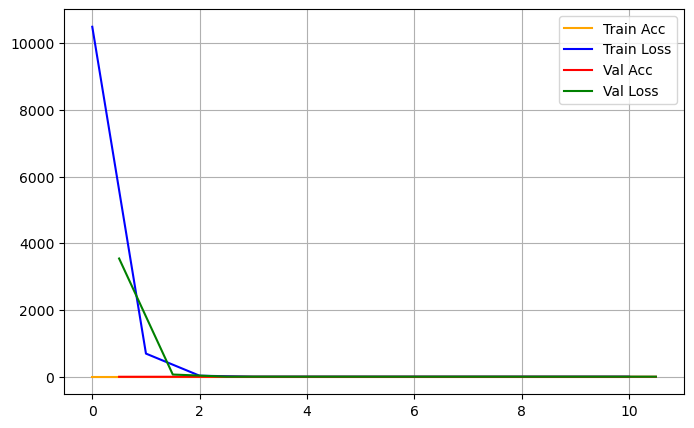

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.5781 - accuracy: 0.2087 - val_loss: 1.8823 - val_accuracy: 0.3982
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7649 - accuracy: 0.4145 - val_loss: 1.7585 - val_accuracy: 0.3904
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.3138 - accuracy: 0.5514 - val_loss: 1.1833 - val_accuracy: 0.6012
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1380 - accuracy: 0.6162 - val_loss: 1.3880 - val_accuracy: 0.5449
Epoch 5/20
858/858 [==============================] - 1s 2ms/step - loss: 0.9497 - accuracy: 0.6841 - val_loss: 0.9893 - val_accuracy: 0.6542
Epoch 6/20
858/858 [==============================] - 1s 2ms/step - loss: 0.9268 - accuracy: 0.6983 - val_loss: 1.5541 - val_accuracy: 0.5226
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 0.6947 - accuracy: 0.7709 - val_loss: 2.3589 - val_accuracy: 0.4228
Epoch 

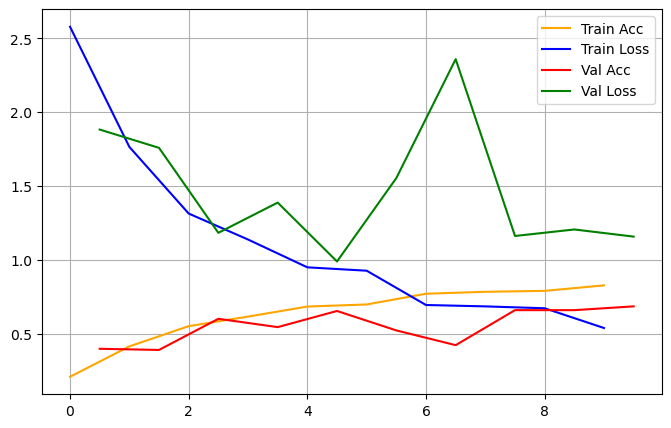

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.9327 - accuracy: 0.1440 - val_loss: 2.5930 - val_accuracy: 0.2415
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.2101 - accuracy: 0.3260 - val_loss: 2.1416 - val_accuracy: 0.3229
Epoch 3/20
858/858 [==============================] - 1s 2ms/step - loss: 1.7469 - accuracy: 0.4421 - val_loss: 1.8101 - val_accuracy: 0.4189
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.4622 - accuracy: 0.5290 - val_loss: 1.5956 - val_accuracy: 0.4936
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.2682 - accuracy: 0.5801 - val_loss: 1.5098 - val_accuracy: 0.5137
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1127 - accuracy: 0.6322 - val_loss: 1.3494 - val_accuracy: 0.5700
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 0.9947 - accuracy: 0.6710 - val_loss: 1.4603 - val_accuracy: 0.5471
Epoch 

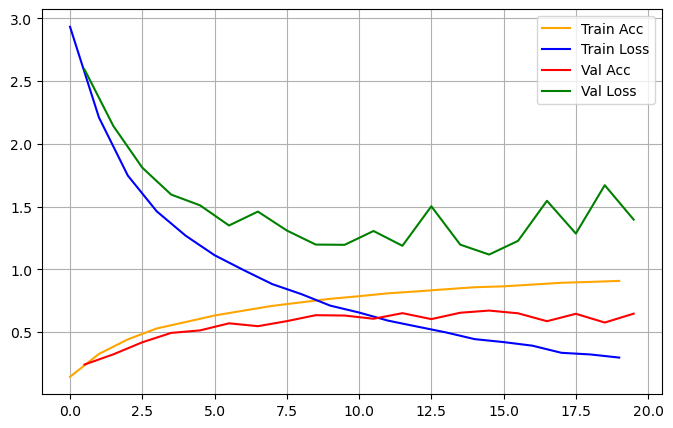

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 3.1764 - accuracy: 0.0725 - val_loss: 3.1418 - val_accuracy: 0.1060
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 3.1090 - accuracy: 0.0972 - val_loss: 3.0859 - val_accuracy: 0.0943
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 3.0438 - accuracy: 0.1067 - val_loss: 3.0181 - val_accuracy: 0.0976
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 2.9666 - accuracy: 0.1148 - val_loss: 2.9351 - val_accuracy: 0.1088
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 2.8775 - accuracy: 0.1176 - val_loss: 2.8484 - val_accuracy: 0.1160
Epoch 6/20
858/858 [==============================] - 1s 2ms/step - loss: 2.7783 - accuracy: 0.1305 - val_loss: 2.7485 - val_accuracy: 0.1517
Epoch 7/20
858/858 [==============================] - 2s 2ms/step - loss: 2.6734 - accuracy: 0.1631 - val_loss: 2.6498 - val_accuracy: 0.1913
Epoch 

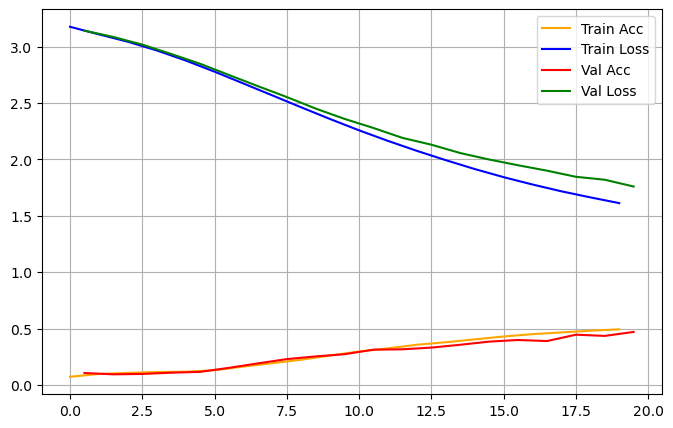

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 3.2661 - accuracy: 0.0299 - val_loss: 3.2840 - val_accuracy: 0.0106
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 3.2234 - accuracy: 0.0343 - val_loss: 3.2637 - val_accuracy: 0.0178
Epoch 3/20
858/858 [==============================] - 1s 2ms/step - loss: 3.2150 - accuracy: 0.0396 - val_loss: 3.2550 - val_accuracy: 0.0190
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 3.2090 - accuracy: 0.0413 - val_loss: 3.2467 - val_accuracy: 0.0195
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 3.2038 - accuracy: 0.0416 - val_loss: 3.2403 - val_accuracy: 0.0212
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 3.1990 - accuracy: 0.0431 - val_loss: 3.2343 - val_accuracy: 0.0240
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 3.1944 - accuracy: 0.0441 - val_loss: 3.2318 - val_accuracy: 0.0262
Epoch 

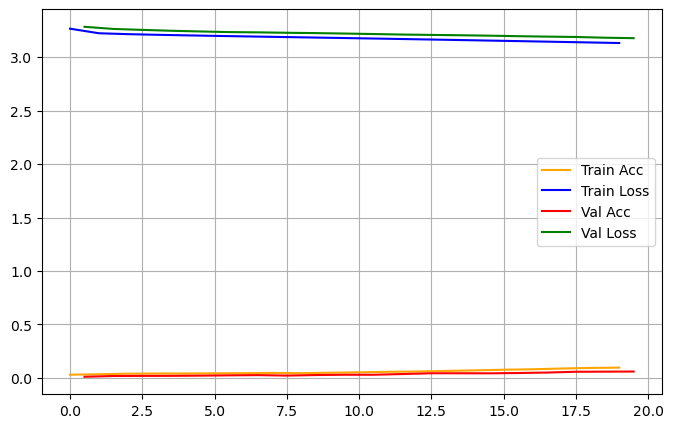

[[0.01, 0.0725041851401329], [0.001, 0.6854434013366699], [0.0001, 0.6715002655982971], [1e-05, 0.4701617360115051], [1.0000000000000002e-06, 0.05967652052640915]]


In [60]:
#change lr to test the different performance
res=[]
for lr in [1,0.1, 0.01,0.001,0.0001]:
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[lr*learningrate,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

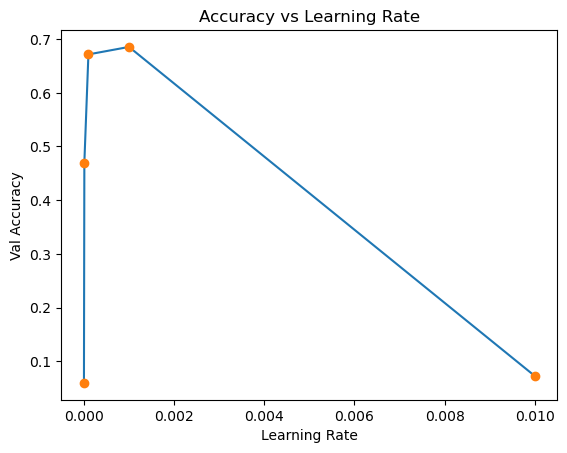

In [61]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

Epoch 1/20
858/858 [==============================] - 1s 1ms/step - loss: 2.9229 - accuracy: 0.1822 - val_loss: 2.6236 - val_accuracy: 0.3140
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.2684 - accuracy: 0.3877 - val_loss: 2.0083 - val_accuracy: 0.4456
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7580 - accuracy: 0.5063 - val_loss: 1.6925 - val_accuracy: 0.5282
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.4749 - accuracy: 0.5763 - val_loss: 1.4911 - val_accuracy: 0.5477
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.2901 - accuracy: 0.6246 - val_loss: 1.3696 - val_accuracy: 0.5767
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1531 - accuracy: 0.6623 - val_loss: 1.3225 - val_accuracy: 0.5878
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0499 - accuracy: 0.6907 - val_loss: 1.2696 - val_accuracy: 0.6180
Epoch 

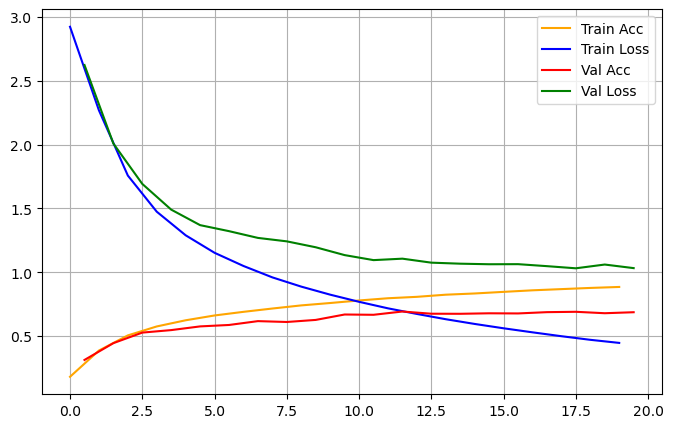

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.9153 - accuracy: 0.1411 - val_loss: 2.4940 - val_accuracy: 0.2348
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.1306 - accuracy: 0.3304 - val_loss: 1.8424 - val_accuracy: 0.4378
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7145 - accuracy: 0.4450 - val_loss: 1.6383 - val_accuracy: 0.4869
Epoch 4/20
858/858 [==============================] - 1s 2ms/step - loss: 1.4431 - accuracy: 0.5290 - val_loss: 1.8398 - val_accuracy: 0.4216
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.2373 - accuracy: 0.5915 - val_loss: 1.6104 - val_accuracy: 0.5148
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0825 - accuracy: 0.6411 - val_loss: 1.4986 - val_accuracy: 0.5494
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 0.9741 - accuracy: 0.6727 - val_loss: 1.4172 - val_accuracy: 0.5728
Epoch 

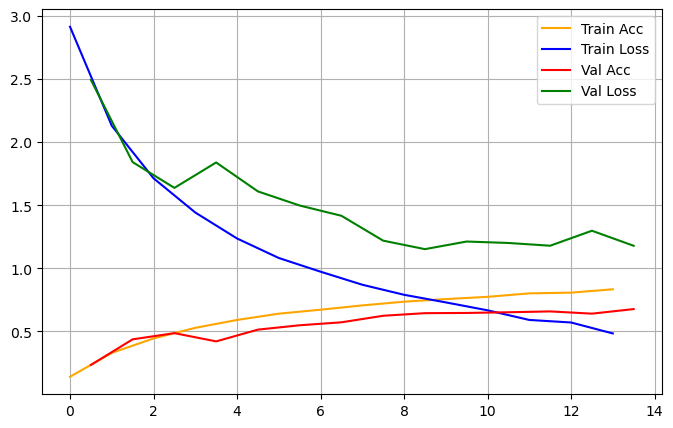

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.8782 - accuracy: 0.1627 - val_loss: 2.5621 - val_accuracy: 0.2292
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.1535 - accuracy: 0.3261 - val_loss: 2.1238 - val_accuracy: 0.3369
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7088 - accuracy: 0.4480 - val_loss: 1.7206 - val_accuracy: 0.4345
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.4246 - accuracy: 0.5357 - val_loss: 1.5064 - val_accuracy: 0.5114
Epoch 5/20
858/858 [==============================] - 1s 2ms/step - loss: 1.2267 - accuracy: 0.5936 - val_loss: 1.5090 - val_accuracy: 0.5086
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0779 - accuracy: 0.6433 - val_loss: 1.6963 - val_accuracy: 0.5047
Epoch 7/20
858/858 [==============================] - 1s 2ms/step - loss: 0.9665 - accuracy: 0.6784 - val_loss: 1.3790 - val_accuracy: 0.5739
Epoch 

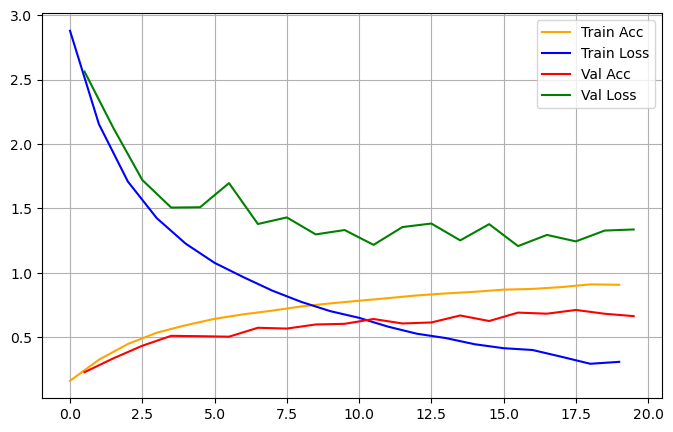

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.9696 - accuracy: 0.1532 - val_loss: 2.6599 - val_accuracy: 0.2002
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.1160 - accuracy: 0.3405 - val_loss: 2.0438 - val_accuracy: 0.3653
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.6423 - accuracy: 0.4613 - val_loss: 1.9319 - val_accuracy: 0.4255
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.3895 - accuracy: 0.5375 - val_loss: 1.7540 - val_accuracy: 0.4356
Epoch 5/20
858/858 [==============================] - 1s 2ms/step - loss: 1.2204 - accuracy: 0.5940 - val_loss: 1.4428 - val_accuracy: 0.5438
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1059 - accuracy: 0.6333 - val_loss: 1.4574 - val_accuracy: 0.5588
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 1.0002 - accuracy: 0.6655 - val_loss: 1.3420 - val_accuracy: 0.5984
Epoch 

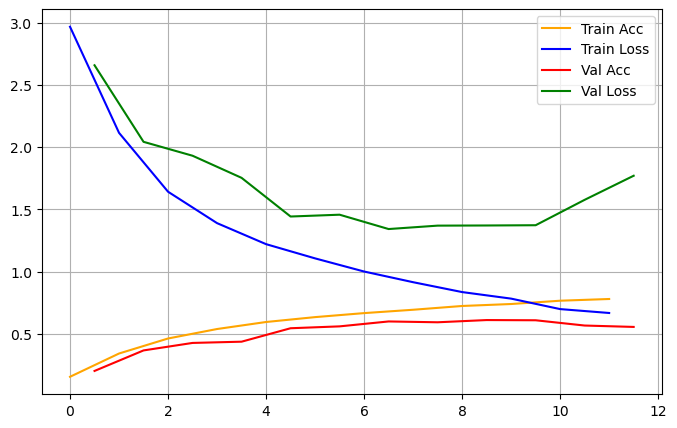

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.9409 - accuracy: 0.1382 - val_loss: 2.5284 - val_accuracy: 0.2454
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.1944 - accuracy: 0.3173 - val_loss: 1.9726 - val_accuracy: 0.3999
Epoch 3/20
858/858 [==============================] - 1s 2ms/step - loss: 1.6765 - accuracy: 0.4583 - val_loss: 1.6310 - val_accuracy: 0.4702
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.3839 - accuracy: 0.5417 - val_loss: 1.5483 - val_accuracy: 0.5153
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.2245 - accuracy: 0.5843 - val_loss: 1.3232 - val_accuracy: 0.5912
Epoch 6/20
858/858 [==============================] - 1s 2ms/step - loss: 1.0938 - accuracy: 0.6305 - val_loss: 1.4914 - val_accuracy: 0.5588
Epoch 7/20
858/858 [==============================] - 1s 2ms/step - loss: 0.9948 - accuracy: 0.6609 - val_loss: 1.2966 - val_accuracy: 0.5912
Epoch 

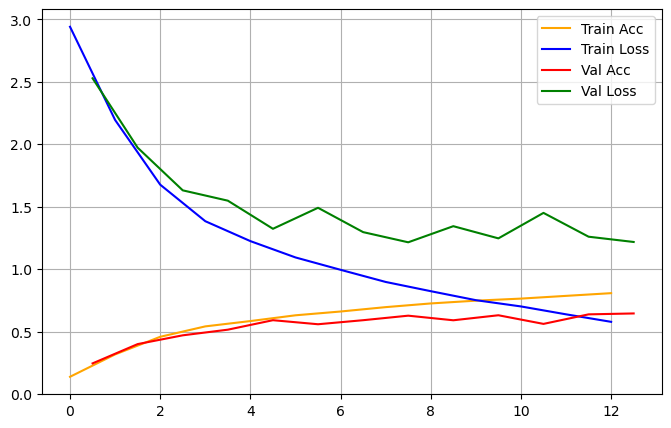

[[1, 0.6932515501976013], [3, 0.6776352524757385], [5, 0.7122141718864441], [7, 0.609592854976654], [12, 0.6452872157096863]]


In [62]:
#change the number of hidden layers to test the different performance
res=[]
for n in [1, 3, 5, 7, 12]:
    valacc, history, discard = do_all(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[n,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

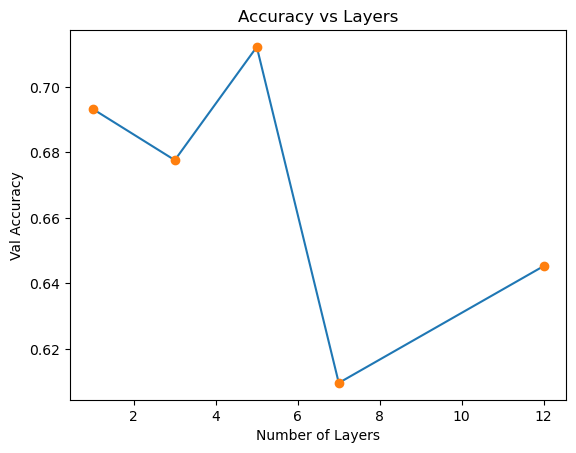

In [63]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.plot(res[:,0],res[:,1],'o')
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.9643 - accuracy: 0.1556 - val_loss: 2.6687 - val_accuracy: 0.2131
Epoch 2/20
858/858 [==============================] - 1s 2ms/step - loss: 2.2133 - accuracy: 0.3185 - val_loss: 1.8609 - val_accuracy: 0.4083
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7211 - accuracy: 0.4410 - val_loss: 1.7227 - val_accuracy: 0.4596
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.4587 - accuracy: 0.5271 - val_loss: 1.7537 - val_accuracy: 0.4339
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.2686 - accuracy: 0.5861 - val_loss: 1.5521 - val_accuracy: 0.4897
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.1264 - accuracy: 0.6304 - val_loss: 1.3797 - val_accuracy: 0.5789
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 0.9983 - accuracy: 0.6731 - val_loss: 1.3977 - val_accuracy: 0.5572
Epoch 

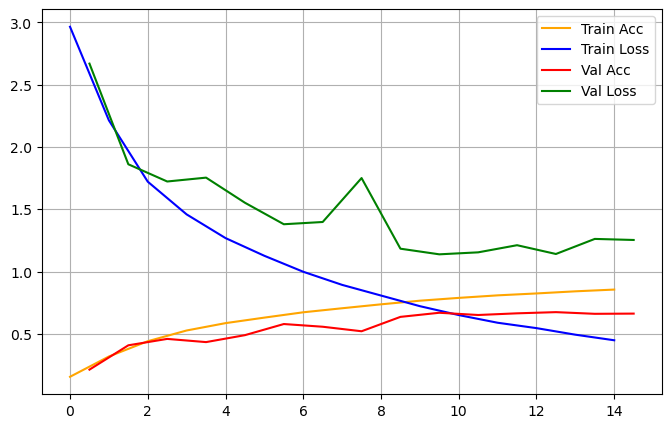

Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 2.4591 - accuracy: 0.1904 - val_loss: 2.2417 - val_accuracy: 0.2672
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.0944 - accuracy: 0.2657 - val_loss: 2.2209 - val_accuracy: 0.2487
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 1.9974 - accuracy: 0.2959 - val_loss: 2.1981 - val_accuracy: 0.2387
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 1.9215 - accuracy: 0.3129 - val_loss: 2.2647 - val_accuracy: 0.2532
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.8596 - accuracy: 0.3314 - val_loss: 2.2827 - val_accuracy: 0.2956
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.8347 - accuracy: 0.3378 - val_loss: 2.2265 - val_accuracy: 0.3045
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7900 - accuracy: 0.3538 - val_loss: 2.1611 - val_accuracy: 0.3140
Epoch 

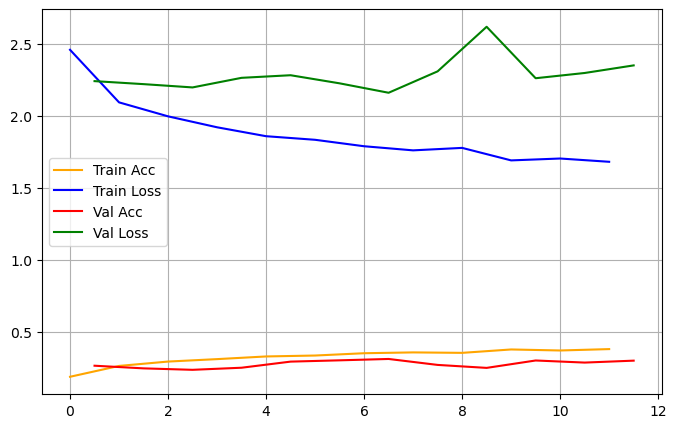

Epoch 1/20
858/858 [==============================] - 2s 1ms/step - loss: 2.9327 - accuracy: 0.1043 - val_loss: 2.7178 - val_accuracy: 0.1344
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 2.5505 - accuracy: 0.1787 - val_loss: 2.4348 - val_accuracy: 0.1946
Epoch 3/20
858/858 [==============================] - 1s 1ms/step - loss: 2.3812 - accuracy: 0.2235 - val_loss: 2.2029 - val_accuracy: 0.2839
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 2.0851 - accuracy: 0.2981 - val_loss: 2.1015 - val_accuracy: 0.3101
Epoch 5/20
858/858 [==============================] - 1s 1ms/step - loss: 1.8816 - accuracy: 0.3599 - val_loss: 1.9318 - val_accuracy: 0.3614
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 1.7504 - accuracy: 0.4012 - val_loss: 1.8167 - val_accuracy: 0.4233
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 1.6256 - accuracy: 0.4544 - val_loss: 2.1965 - val_accuracy: 0.3971
Epoch 

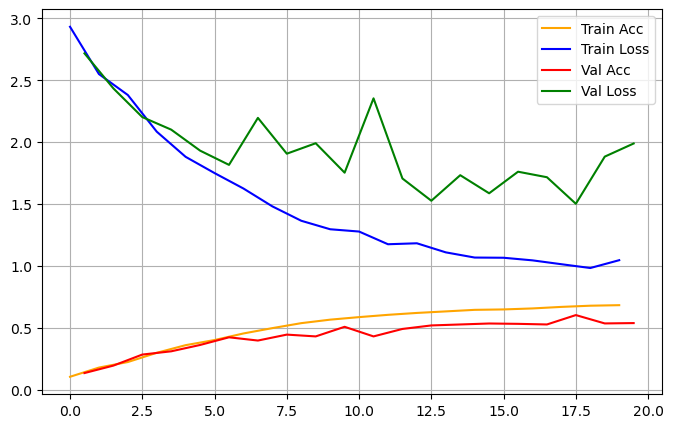

Epoch 1/20
858/858 [==============================] - 4s 2ms/step - loss: 2.7254 - accuracy: 0.1285 - val_loss: 2.7300 - val_accuracy: 0.1439
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 2.5553 - accuracy: 0.1512 - val_loss: 2.6669 - val_accuracy: 0.1339
Epoch 3/20
858/858 [==============================] - 2s 2ms/step - loss: 2.5219 - accuracy: 0.1574 - val_loss: 2.6686 - val_accuracy: 0.1528
Epoch 4/20
858/858 [==============================] - 1s 1ms/step - loss: 2.4683 - accuracy: 0.1684 - val_loss: 2.7103 - val_accuracy: 0.1015
Epoch 5/20
858/858 [==============================] - 2s 2ms/step - loss: 2.4591 - accuracy: 0.1689 - val_loss: 2.7268 - val_accuracy: 0.1032
Epoch 6/20
858/858 [==============================] - 1s 1ms/step - loss: 2.4244 - accuracy: 0.1796 - val_loss: 2.8062 - val_accuracy: 0.1160
Epoch 7/20
858/858 [==============================] - 1s 1ms/step - loss: 2.4059 - accuracy: 0.1846 - val_loss: 2.8293 - val_accuracy: 0.0876


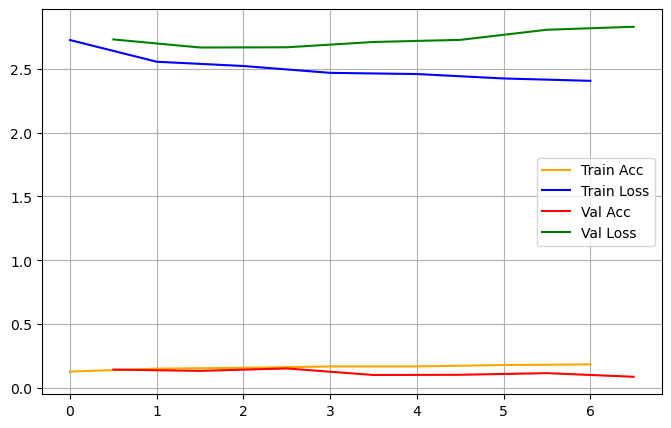

In [64]:
#change the optimizers to test the different performance
res=[]
optimizer_setup = [[keras.optimizers.SGD,0.01], [keras.optimizers.Adam,0.01],[keras.optimizers.RMSprop, 0.01], [keras.optimizers.Nadam, 0.01]]
for optimizer,lr in optimizer_setup :
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

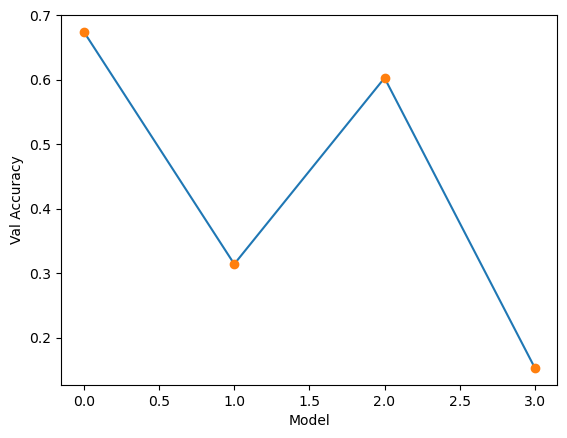

In [65]:
res=np.array(res)
plt.plot(res)
plt.plot(res,'o')
plt.xlabel('Model')
plt.ylabel('Val Accuracy')
plt.show()

In [224]:
#We can see from the results of accuracy that 2 best models are:1st is CNN with 0.1 lr and other parameters are default ones,like batch 
#size=32 and activiction function is 'elu',optimizer is SGD.
#2nd are CNN with 0.01 learning rate with Adam optimizers,with other value as default values,like batch size=32 and activition
#function is 'elu'.

In [88]:
#1st CNN model,firstly set a 10 epochs to explore the change of the loss curve and accuracy curve
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16] 
actfn = "elu"
optimizer = keras.optimizers.SGD
learningrate = 0.1   
batch_size = 32
n_epochs = 10
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))   
    model.add(keras.layers.MaxPooling2D(pool_size=2))         
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))         
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(25, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/10
858/858 [==============================] - 11s 12ms/step - loss: 0.7052 - accuracy: 0.7872 - val_loss: 0.3087 - val_accuracy: 0.9124
Epoch 2/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0130 - accuracy: 0.9980 - val_loss: 0.3418 - val_accuracy: 0.9147
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3521 - val_accuracy: 0.9175
Epoch 4/10
858/858 [==============================] - 11s 12ms/step - loss: 9.1592e-04 - accuracy: 1.0000 - val_loss: 0.3735 - val_accuracy: 0.9163
Epoch 5/10
858/858 [==============================] - 11s 13ms/step - loss: 6.0580e-04 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.9202
Epoch 6/10
858/858 [==============================] - 12s 14ms/step - loss: 4.4092e-04 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.9225


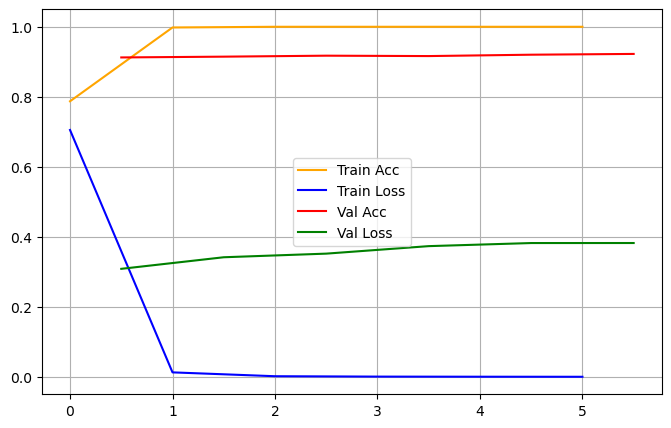

In [89]:
plot_history(history)

In [90]:
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')
#we can see the model converges quickly and overfits, the training accuracy is 100%,which means the model learns too many details of the 
#data.
#To imporve the generalization ability and avoid overfitting problem,we add dropout layers in our CNN model to allow it drop some 
#details.

Accuracy on test set = 0.896


In [112]:
#1st CNN with dropout layers
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16] 
actfn = "elu"
optimizer = keras.optimizers.SGD
learningrate = 0.1   
batch_size = 32
n_epochs = 10
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))         
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
        model.add(keras.layers.Dropout(0.8)) #We add a dropout layer here to aviod learning too many details
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(25, activation = "softmax")) 
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/10
858/858 [==============================] - 16s 18ms/step - loss: 1.2362 - accuracy: 0.6143 - val_loss: 0.4433 - val_accuracy: 0.8494
Epoch 2/10
858/858 [==============================] - 15s 17ms/step - loss: 0.3474 - accuracy: 0.8796 - val_loss: 0.2740 - val_accuracy: 0.9102
Epoch 3/10
858/858 [==============================] - 15s 18ms/step - loss: 0.2474 - accuracy: 0.9142 - val_loss: 0.2720 - val_accuracy: 0.9085
Epoch 4/10
858/858 [==============================] - 15s 18ms/step - loss: 0.1834 - accuracy: 0.9371 - val_loss: 0.1821 - val_accuracy: 0.9364
Epoch 5/10
858/858 [==============================] - 15s 17ms/step - loss: 0.1631 - accuracy: 0.9459 - val_loss: 0.1718 - val_accuracy: 0.9414
Epoch 6/10
858/858 [==============================] - 12s 14ms/step - loss: 0.1445 - accuracy: 0.9522 - val_loss: 0.1604 - val_accuracy: 0.9571
Epoch 7/10
858/858 [==============================] - 15s 18ms/step - loss: 0.1316 - accuracy: 0.9559 - val_loss: 0.1718 - val_accuracy:

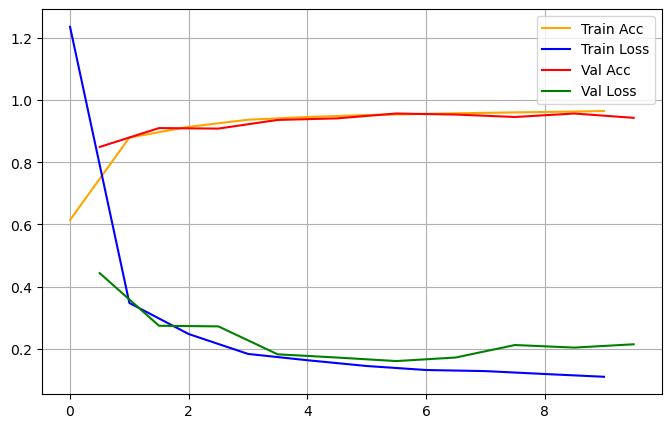

In [113]:
plot_history(history)

In [114]:
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')
#The curves indicates our method is good and val loss curve tells us the overfitting problem decreases a lot, we have a better 
#performance on test set.

Accuracy on test set = 0.929


Epoch 1/6
858/858 [==============================] - 12s 14ms/step - loss: 1.2242 - accuracy: 0.6148 - val_loss: 0.4074 - val_accuracy: 0.8600
Epoch 2/6
858/858 [==============================] - 11s 13ms/step - loss: 0.3414 - accuracy: 0.8826 - val_loss: 0.2362 - val_accuracy: 0.9191
Epoch 3/6
858/858 [==============================] - 10s 11ms/step - loss: 0.2222 - accuracy: 0.9218 - val_loss: 0.2229 - val_accuracy: 0.9353
Epoch 4/6
858/858 [==============================] - 10s 12ms/step - loss: 0.1774 - accuracy: 0.9392 - val_loss: 0.1523 - val_accuracy: 0.9431
Epoch 5/6
858/858 [==============================] - 11s 13ms/step - loss: 0.1475 - accuracy: 0.9498 - val_loss: 0.2215 - val_accuracy: 0.9336
Epoch 6/6
858/858 [==============================] - 11s 13ms/step - loss: 0.1324 - accuracy: 0.9561 - val_loss: 0.1795 - val_accuracy: 0.9526


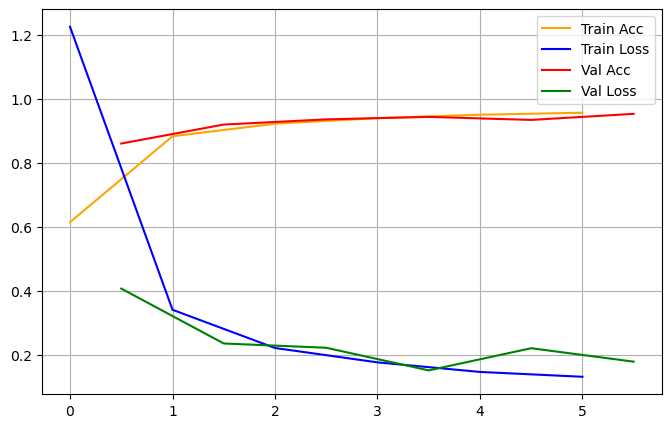

Accuracy on test set = 0.944


In [119]:
#1st CNN this time we stop the model with best performance epoch, this can give us a better result and help use solve overfitting 
#problems,too,and we can get our best performance.
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16] 
actfn = "elu"
optimizer = keras.optimizers.SGD
learningrate = 0.1   
batch_size = 32
n_epochs = 6
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))   
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))         
        model.add(keras.layers.Dropout(0.8)) 
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(25, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
plot_history(history)
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')

In [204]:
#then we print out some details what our cilents' want.
y_pred = model.predict(X_test_resized)
predicted_labels = np.argmax(y_pred, axis=1)
unique_labels = trdata.label.unique()
sorted_labels = np.sort(unique_labels)
letter_correct = [0 for i in sorted_labels]
letter_correct.append(0)
letter_total = [0 for i in sorted_labels]
letter_total.append(0)
for i in range(len(predicted_labels)):
    true_label = lsy[i]
    letter_total[true_label] += 1
    if predicted_labels[i] == true_label:
        letter_correct[true_label] += 1
z = []
for i in sorted_labels:
    if letter_total[i] > 0: 
        accuracy = letter_correct[i] / letter_total[i]
        z.append(accuracy)
lst = []
for i in z:
    if i != 0:
        lst.append(i)
min_accuracy = min(lst)
min_index = lst.index(min_accuracy)
chart = []
for accuracy, label in zip(z, sorted_labels):
    a = (accuracy, label)
    chart.append(a)
print("\nThe accuracy for each letter is:\n",chart)
print("\nThe minimum accuracy in method is:", min_accuracy)
print("\nThe letter with minimum accuracy in method is:", sorted_labels[min_index])
error_counts = {}
for i in range(len(predicted_labels)):
    true_label = lsy[i]
    if predicted_labels[i] != true_label:
        error_key = (true_label, predicted_labels[i])
        if error_key in error_counts:
            error_counts[error_key] += 1
        else:
            error_counts[error_key] = 1
common_error = max(error_counts, key=error_counts.get)
print("\nThe most common error:", common_error)
print("\nNumber of times:", error_counts[common_error])
#The letter with minimum accuracy in method is T，the most common error is regarding H as G.

169/169 [==============================] - 1s 4ms/step

The accuracy for each letter is:
 [(1.0, 0), (0.9879518072289156, 1), (0.9914163090128756, 2), (1.0, 3), (1.0, 4), (1.0, 5), (0.934156378600823, 6), (0.8895705521472392, 7), (1.0, 8), (0.9282868525896414, 10), (1.0, 11), (0.9183006535947712, 12), (0.7666666666666667, 13), (0.9895287958115183, 14), (1.0, 15), (0.9076923076923077, 16), (1.0, 17), (0.8222222222222222, 18), (0.7360406091370558, 19), (0.9112149532710281, 20), (0.940677966101695, 21), (1.0, 22), (0.9904306220095693, 23), (0.9330708661417323, 24)]

The minimum accuracy in method is: 0.7360406091370558

The letter with minimum accuracy in method is: 19

The most common error: (7, 6)

Number of times: 36


Epoch 1/10
858/858 [==============================] - 11s 12ms/step - loss: 0.7474 - accuracy: 0.8642 - val_loss: 3.3962 - val_accuracy: 0.8305
Epoch 2/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0624 - accuracy: 0.9930 - val_loss: 2.1198 - val_accuracy: 0.8991
Epoch 3/10
858/858 [==============================] - 10s 12ms/step - loss: 1.0248 - accuracy: 0.9639 - val_loss: 9.9292 - val_accuracy: 0.8918
Epoch 4/10
858/858 [==============================] - 13s 15ms/step - loss: 0.1151 - accuracy: 0.9956 - val_loss: 7.9606 - val_accuracy: 0.9091
Epoch 5/10
858/858 [==============================] - 11s 13ms/step - loss: 0.4607 - accuracy: 0.9893 - val_loss: 17.4351 - val_accuracy: 0.8806
Epoch 6/10
858/858 [==============================] - 11s 12ms/step - loss: 0.3381 - accuracy: 0.9942 - val_loss: 17.9983 - val_accuracy: 0.8901
Epoch 7/10
858/858 [==============================] - 11s 13ms/step - loss: 0.6112 - accuracy: 0.9911 - val_loss: 19.9226 - val_accura

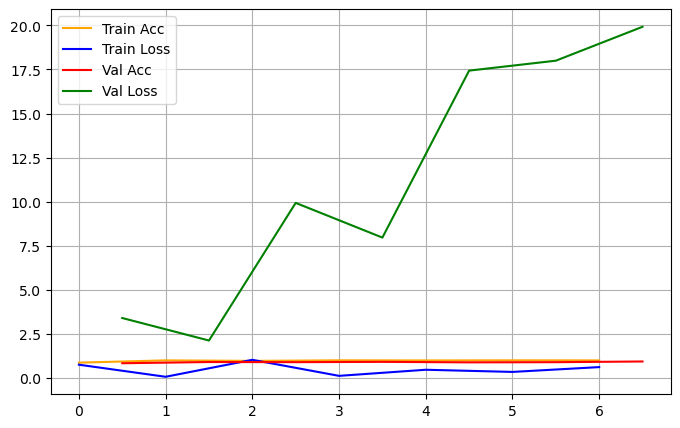

In [211]:
#2nd best model,also a CNN,set a 10 epoch to explore the change of the loss curve and accuracy curve
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16]
actfn = "elu"
optimizer = keras.optimizers.Adam
learningrate = 0.01   
batch_size = 32
n_epochs = 10
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))        
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))         
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                         
    model.add(keras.layers.Dense(25, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
plot_history(history)

In [212]:
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')

Accuracy on test set = 0.881


Epoch 1/10
858/858 [==============================] - 12s 13ms/step - loss: 1.5532 - accuracy: 0.6406 - val_loss: 1.2476 - val_accuracy: 0.7585
Epoch 2/10
858/858 [==============================] - 11s 13ms/step - loss: 1.8601 - accuracy: 0.7749 - val_loss: 1.3381 - val_accuracy: 0.8639
Epoch 3/10
858/858 [==============================] - 12s 14ms/step - loss: 1.8114 - accuracy: 0.8296 - val_loss: 1.5274 - val_accuracy: 0.8645
Epoch 4/10
858/858 [==============================] - 11s 13ms/step - loss: 1.9672 - accuracy: 0.8521 - val_loss: 0.7514 - val_accuracy: 0.9269
Epoch 5/10
858/858 [==============================] - 11s 12ms/step - loss: 2.1526 - accuracy: 0.8636 - val_loss: 1.1627 - val_accuracy: 0.8868
Epoch 6/10
858/858 [==============================] - 10s 12ms/step - loss: 2.0819 - accuracy: 0.8817 - val_loss: 1.4352 - val_accuracy: 0.9063
Epoch 7/10
858/858 [==============================] - 12s 15ms/step - loss: 2.3422 - accuracy: 0.8849 - val_loss: 1.1014 - val_accuracy:

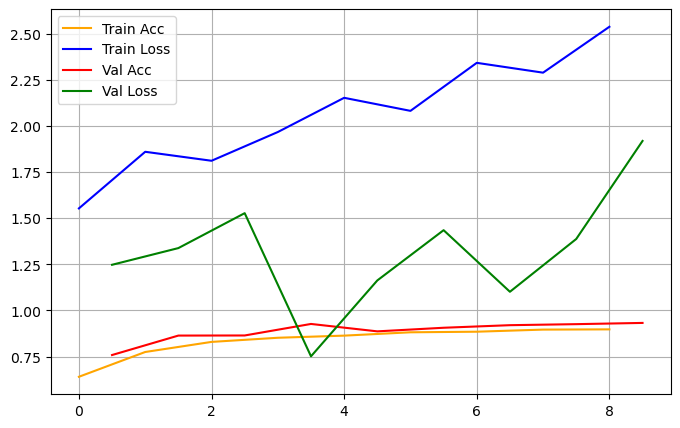

In [217]:
#2nd CNN still have converges too fast and overfitting problems, we use the same way like what we do in lst model
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16]
actfn = "elu"
optimizer = keras.optimizers.Adam
learningrate = 0.01   
batch_size = 32
n_epochs = 10
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))         
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn)) 
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
        model.add(keras.layers.Dropout(0.8))  #Add dropout layers here
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn)) 
    model.add(keras.layers.Flatten())                         
    model.add(keras.layers.Dense(25, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
plot_history(history)

In [218]:
#We can see the same trend,though not as good as 1st model,the loss curve of validation set also indicates that the overfitting problem
#released to some degree
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')

Accuracy on test set = 0.911


Epoch 1/3
858/858 [==============================] - 14s 15ms/step - loss: 1.4569 - accuracy: 0.6420 - val_loss: 1.0276 - val_accuracy: 0.7992
Epoch 2/3
858/858 [==============================] - 13s 15ms/step - loss: 1.8988 - accuracy: 0.7651 - val_loss: 2.1555 - val_accuracy: 0.7624
Epoch 3/3
858/858 [==============================] - 13s 15ms/step - loss: 1.8743 - accuracy: 0.8273 - val_loss: 1.2076 - val_accuracy: 0.8985


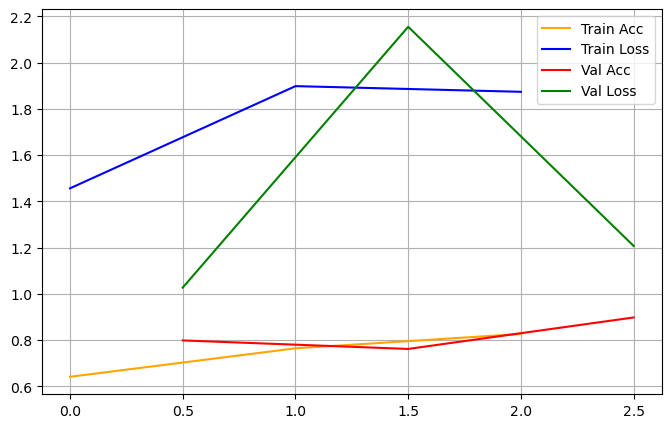

In [221]:
#2nd CNN we stop the model with best performance epoch,like what we do in lst model.
model=None
n_train = 27454
n_valid = 1793
hiddensizes = [16, 32, 16] 
actfn = "elu"
optimizer = keras.optimizers.Adam
learningrate = 0.01   
batch_size = 32
n_epochs = 3 #change the epoch
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))   
    model.add(keras.layers.MaxPooling2D(pool_size=2))         
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn)) 
        model.add(keras.layers.MaxPooling2D(pool_size=2))        
        model.add(keras.layers.Dropout(0.8)) 
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(25, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 
def do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train_resized[:n_train,:,:], y_train[:n_train], epochs=n_epochs, callbacks = callbacks,
                        validation_data=(X_val_resized[:n_valid,:,:], y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)
valacc, history, model = do_all(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
plot_history(history)

In [222]:
testres = model.evaluate(X_test_resized, y_test, verbose=0)
print(f'Accuracy on test set = {testres[1]:.3f}')
#The best performance is 0.869,nearly 7% less that the best model.

Accuracy on test set = 0.869


#improvements:There are several ways to improve our results:

1.change the rate 0.8 of the dropout layers,which means how many information we want our model to forget every round,or change the number of the dropout layers

2.use more data or use online-dataset to pretrain the model,which will help to relieve overfitting problem and always have better results.
 
3.although the parameter sets with the best individual parameters cannot combine a best one,which is common. we can still try to combine different

parameters like learning rates,optimisizers and conv layers to find a better model